# Simulating dynamics of mass-spring-damper

Consider the following setup

<img src="./data/mass_spring_damper.png" width="250">

Which can be described by the following linear differential equation:

$$
\begin{equation}
m\ddot{x}(t) + c\dot{x}(t) + kx(t) = F(t),
\end{equation}
$$
where $x(t)$ is position of mass, m is mass, k is stiffness and c is damping. Internal force $g(t)$ is gravity, defined as
$$
\begin{equation}
F(t) = -mg,
\end{equation}
$$
therefore, we can write
$$
\begin{equation}
\ddot{x}(t) + \frac{c}{m}\dot{x}(t) + \frac{k}{m}x(t) = -g.
\end{equation}
$$

This system is so simple, we can just write state space using position and velocity of mass $m$
$$
\begin{align}
\dot{x_1} = x_2  \\
\dot{x_2} = - \frac{k}{m}x_1 - \frac{c}{m}x_2 - g
\end{align}
$$
which is our state space formulation (2 ODEs).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [11]:
# parameters of the system

k = 700 # spring stiffness
c = 2.0 # damping parameter
m = 1 # mass
g = 9.81 # gravity

# simulation time
t_start = 0
t_stop = 20

# intial conditions
x1_0 = 0
x2_0 = 0

In [23]:
A = np.array([
    [0, 1],
    [-k/m, -c/m],
])
B = np.array([[0],[1]])
C = np.array([[1,0]])
D = np.array([[0]])
state_space = scipy.signal.StateSpace(A,B,C,D)

In [24]:
state_space

StateSpaceContinuous(
array([[   0.,    1.],
       [-700.,   -2.]]),
array([[0],
       [1]]),
array([[1, 0]]),
array([[0]]),
dt: None
)

In [25]:
t = np.linspace(0, 20, 1000)
F = -g + t*0
_, y_lsim, xs = scipy.signal.lsim(state_space, U=F, T=t)

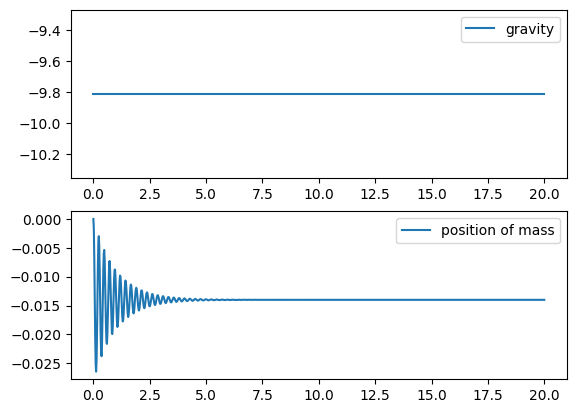

In [27]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(t, F, label="gravity")
plt.legend()
plt.subplot(2,1,2)
plt.plot(t, y_lsim, label="position of mass")
plt.legend()

### Maybe for those, who come from MATLAB

In [31]:
# Function to solve
from scipy import integrate

def func(t, z, k, c, m, g):
    x1, x2 = z
    x1_dot = x2
    x2_dot = -k/m*x1 - c/m*x2 - g
    return [x1_dot, x2_dot]
sol = integrate.solve_ivp(func,[t_start, t_stop], [x1_0, x2_0], args=(k, c, m, g), method="RK23", max_step = 0.1)

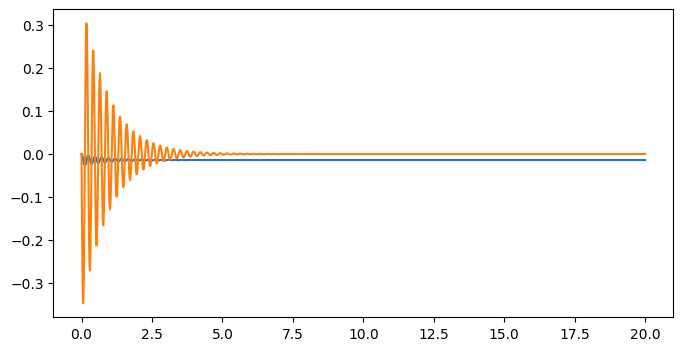

In [32]:
fig = plt.figure(figsize = (8,4),dpi = 100)
plt.plot(sol.t, sol.y[0], label = "position")
plt.plot(sol.t, sol.y[1], label = "speed")